$s$

In [185]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/slider_cranck
    out.clear_output()


In [186]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [75]:
fig = plt.figure('l',figsize=(10,4))
plt.plot(m.simulations[0][0]['rbs_slider.x'],m.simulations[0][0]['rbs_connecting.z'])
plt.title('<b>L')
plt.tick_params(color='r')
plt.xlabel('rbs_slider.x')
plt.ylabel('rbs_connecting.z')
plt.grid(color='r', linestyle='-', linewidth=2)
fig.add_subplot
plotly.offline.iplot_mpl(fig,resize=False,strip_style=False)

In [180]:
data1 = plotly.graph_objs.Scatter(x=m.simulations[0][0]['rbs_slider.x'],y=m.simulations[0][0]['rbs_connecting.z'])
data2 = plotly.graph_objs.Scatter(x=m.simulations[0][0]['rbs_slider.x'],y=m.simulations[0][0]['rbs_crank.z'])
layout = go.Layout(xaxis=dict(nticks=10,mirror='all',showline=True,linewidth=2,linecolor='#cdc0b0'),yaxis=dict(nticks=10,mirror='all',showline=True,linewidth=2,linecolor='#cdc0b0'),
    autosize=True,
    width=700,
    height=300,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    
    paper_bgcolor='#f8f8ff',
    plot_bgcolor='#f5f5f5'
)
fig = go.Figure(data=[data1,data2], layout=layout)
plotly.offline.iplot(fig)

In [189]:
fig.layout.paper_bgcolor='#bebebe'
plotly.offline.iplot(fig)

In [55]:
d.close()
import dill
with open('slider_crank2','rb') as d:
    dill.load(d)


EOFError: Ran out of input

In [7]:
m.model_tree()

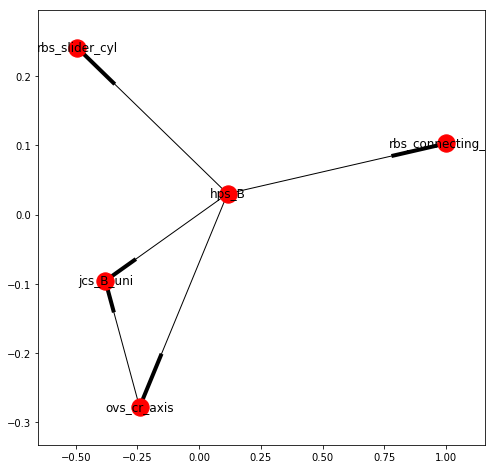

In [96]:
node='hps_B'
g = m.data_graph.subgraph(list(m.data_graph.successors(node))+[node])
fig = plt.figure(figsize=(8,8))
layout = nx.circular_layout(g)
nx.draw_networkx(g,with_labels=True)
#nx.draw_networkx(g)#,with_labels=True,pos=layout)
plt.show()

In [112]:
g=m.data_graph.copy()

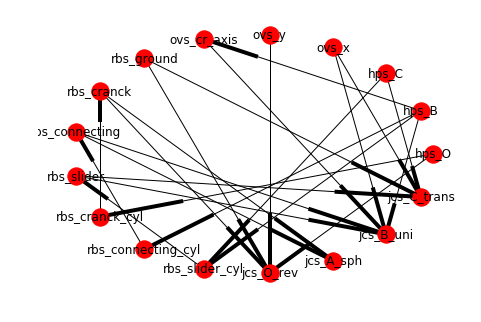

In [125]:
nx.draw_circular(g,with_labels=True)
plt.show()

In [11]:
import pickle
with open("slider_cranck", "rb") as f:
     data = pickle.load(f)
data

points        hps_A     ([50.0], [0.0], [50.0])
hps_B    ([2...
bodies        rbs_connecting    rbs_connecting
rbs_cranck   ...
joints        jcs_A_sph      <constraints.spherical object a...
geometries    rbs_connecting_cyl    <inertia_properties.circ...
vectors       ovs_cr_axis    ([-150.0], [0.0], [30.0])
ovs_x...
forces                               Series([], dtype: float64)
data_graph    (hps_O, hps_A, hps_B, hps_C, ovs_x, ovs_y, ovs...
topology      (rbs_cranck, rbs_ground, rbs_connecting, rbs_s...
dtype: object

In [136]:
g.add_edges_from([('Geometries',i) for i in m.geometries.index])

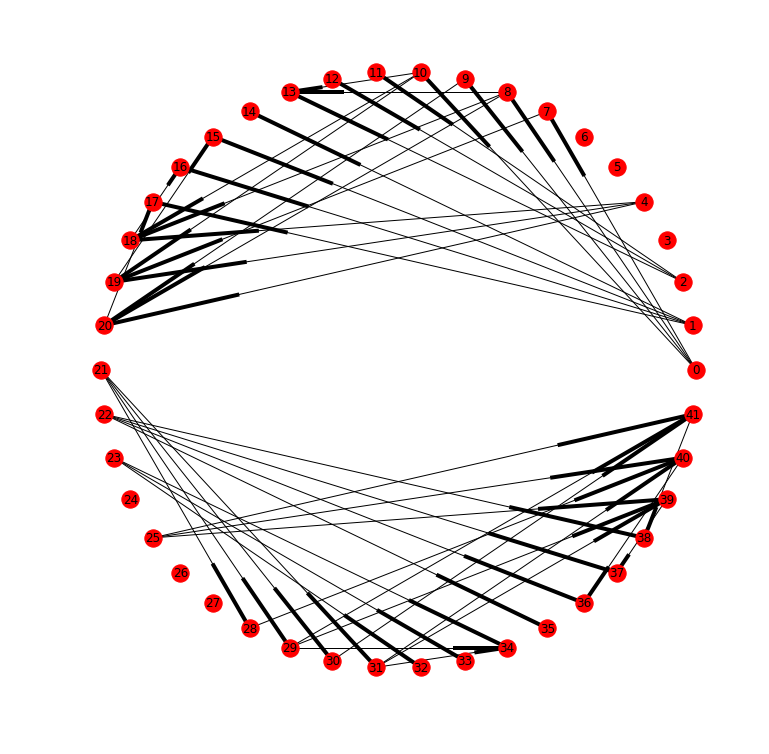

In [11]:
#g_points=g.subgraph(g.successors('Points'))
g=m.graph.copy()
gu=nx.union(g,g)
fig=plt.figure(figsize=(10,10))
nx.draw_circular(gu,with_labels=True)
plt.show()

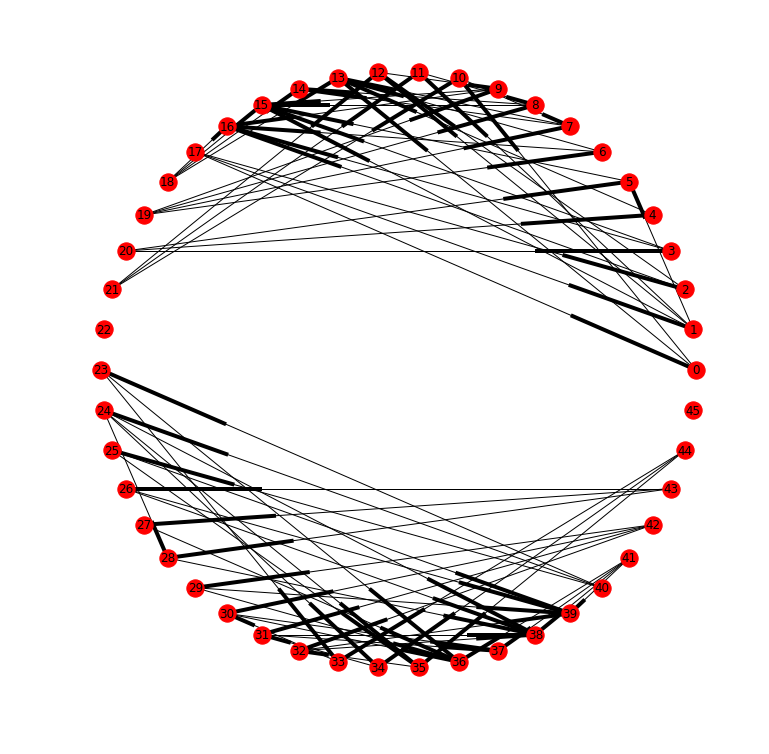

In [164]:
fig=plt.figure(figsize=(10,10))
nx.draw_circular(nx.disjoint_union(g,g),with_labels=True)
plt.show()

In [188]:
pd.Series(dict([(i,g.node[i]['obj']) for i in g.successors('Points')]))

hps_B    ([200.0], [0.0], [20.0])
hps_C    ([220.0], [0.0], [20.0])
hps_O       ([0.0], [0.0], [0.0])
dtype: object

In [30]:
import plotly
from plotly.offline import iplot
import json
from IPython import display
plotly.offline.init_notebook_mode()
    
trace = plotly.graph_objs.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])

fig = dict(data=[trace])

iplot(fig)
fig

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{'data': [{'type': 'heatmap', 'z': [[1, 20, 30], [20, 1, 60], [30, 60, 1]]}]}

In [45]:
fig = plt.figure()
x = [10, 15, 20, 25, 30]
y = [100, 250, 200, 150, 300]
plt.plot(x, y, "o")

plotly.offline.iplot_mpl(fig)

In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(True)
iplot([{'x': [1, 2, 3], 'y': [5, 2, 7]}])

In [14]:
v=(5 if 'x'=='x' else 2)

In [10]:
vector._normal('vn',m.points['hps_A'],m.points['hps_B'],m.points['hps_C'])

point object at [ 0.18438521  0.03762963  0.98213345]

In [54]:
list(m.data_graph.successors('hps_B'))

['ovs_cr_axis', 'rbs_connecting_cyl', 'rbs_slider_cyl', 'jcs_B_uni']

In [6]:
m.object_predecessors('jcs_A_sph')

Output()

In [3]:
from constraints import translational_actuator
from solvers import dds

In [8]:
m.actuators['slider_actmcs_'].pos_array=

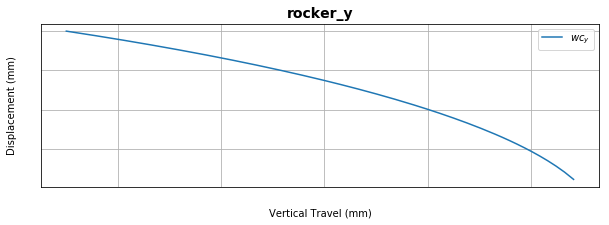

In [14]:
figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(pos_df['rbs_cranck.x'][:129],pos_df['rbs_cranck.z'][:129],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [8]:

topology_writer(m.bodies,m.joints,m.actuators,[],'slider_crank_data_kin')
t=np.linspace(0,2*np.pi,100)

pos_df,vel_df,acc_df,itr=kds(m.bodies,m.joints,m.actuators,'slider_crank_data_kin',t)


Running System Kinematic Analysis:
Progress: [                         ] 1% of 100 steps.Recalculating Jacobian
Progress: [=========================] 100% of 100 steps.

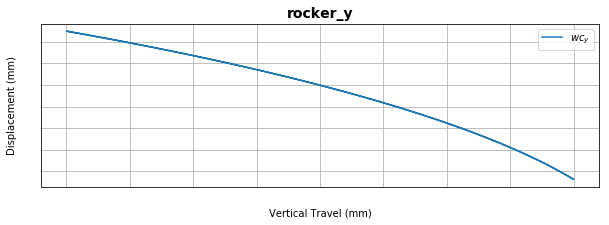

In [11]:
figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')

#plt.plot(np.rad2deg(crank_actuator.pos_array),pos_df['rbs_slider.x'][1:],label=r'$wc_{y}$')
plt.plot(m.actuators[0].pos_f(t),pos_df['rbs_crank.z'][1:],label=r'$wc_{y}$')

plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [37]:
import sympy as sy
sy.init_printing(True)

In [38]:
t=sy.Symbol('t')
theta=sy.Function('theta')(t)
sy.cos(theta)

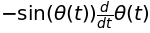

In [19]:
sy.diff(sy.cos(theta),t,1)

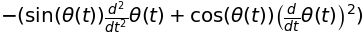

In [20]:
sy.diff(sy.cos(theta),t,2)

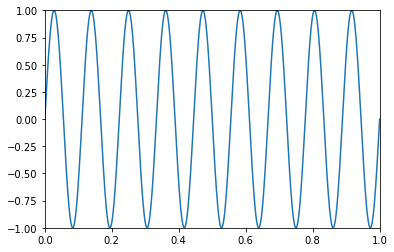

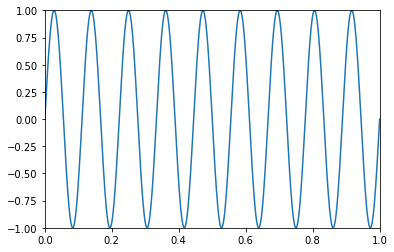

In [14]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
import time

# Create a named display
handle = display(None, display_id=True)

x = linspace(0,1,1000)
y = 0*x

fig, ax = subplots()
line, = ax.plot(x,y)
ax.set_xlim(0,1)
ax.set_ylim(-1,1)

for k in range(1,10):
    line.set_ydata(sin(2*pi*k*x))
    # Update the named display with a new figure
    handle.update(fig)
    

In [26]:
objects_menue = widgets.Select()
objects_menue.options={'Points':dict(m.points),
                               'Vectors':dict(m.vectors),
                               'Bodies':dict(m.bodies)}
objects_menue.label=None

In [27]:
objects_menue

Select(options={'Points': {'hps_A': point object at [ 50.   0.  50.], 'hps_B': point object at [ 200.    0.   …

In [13]:
m.add_point()

In [14]:
m.add_joints()

In [3]:
import cmd

In [5]:
a=cmd.Cmd()

In [7]:
a.parseline('t=np.arange(0,e,s)')

('t', '=np.arange(0,e,s)', 't=np.arange(0,e,s)')

In [10]:
exec('t=np.arange(0,10,1)')

In [11]:
cmd.string.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
widgets.C

In [12]:
w=widgets.Textarea()
w

Textarea(value='')

In [13]:
exec(w.value)

In [29]:
actuation_fun_l = widgets.HTML('<b> Actuation Function')
actuation_fun_v = widgets.Textarea(placeholder='write a python script here defining the actuation function that takes in t variable')
actuation_fun_v.layout=widgets.Layout(width='400px',height='55px')
actuation_fun_b = widgets.VBox([actuation_fun_l,actuation_fun_v])

In [30]:
actuation_fun_b

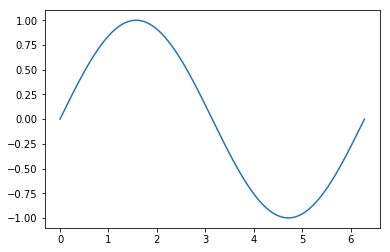

In [25]:
exec(actuation_fun_v.value)

In [27]:
y=lambda t : np.sin(t)

In [28]:
y(t)

array([  0.00000000e+00,   6.34239197e-02,   1.26592454e-01,
         1.89251244e-01,   2.51147987e-01,   3.12033446e-01,
         3.71662456e-01,   4.29794912e-01,   4.86196736e-01,
         5.40640817e-01,   5.92907929e-01,   6.42787610e-01,
         6.90079011e-01,   7.34591709e-01,   7.76146464e-01,
         8.14575952e-01,   8.49725430e-01,   8.81453363e-01,
         9.09631995e-01,   9.34147860e-01,   9.54902241e-01,
         9.71811568e-01,   9.84807753e-01,   9.93838464e-01,
         9.98867339e-01,   9.99874128e-01,   9.96854776e-01,
         9.89821442e-01,   9.78802446e-01,   9.63842159e-01,
         9.45000819e-01,   9.22354294e-01,   8.95993774e-01,
         8.66025404e-01,   8.32569855e-01,   7.95761841e-01,
         7.55749574e-01,   7.12694171e-01,   6.66769001e-01,
         6.18158986e-01,   5.67059864e-01,   5.13677392e-01,
         4.58226522e-01,   4.00930535e-01,   3.42020143e-01,
         2.81732557e-01,   2.20310533e-01,   1.58001396e-01,
         9.50560433e-02,